## Show results - Test 

In [2]:
import numpy as np
import pandas as pd
#from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
import pickle
import palettable
from scipy.sparse import csr_matrix, vstack
from scipy.optimize import curve_fit
import sys 
from netCDF4 import num2date, date2num
import xarray as xr
from netCDF4 import Dataset

sys.path.append('../../')

from climada.engine import Impact
from climada.entity import Exposures
from climada.hazard import Hazard

from src.util.plots import *

fig_dir = '../figures/'

2020-10-23 21:32:55,251 - climada - DEBUG - Loading default config file: /Users/zeliestalhanske/Documents/GitHub/climada_python/climada/conf/defaults.conf


## Damage cost for each scenario, year and labor type

In [3]:
pickle_in = \
open('../../output/mortality_results/impact_10mc.pickle','rb')
impacts_mortality = pickle.load(pickle_in)

agg_impacts_mc = impacts_mortality.agg_impacts_mc
median_impact_matrices = impacts_mortality.median_impact_matrices


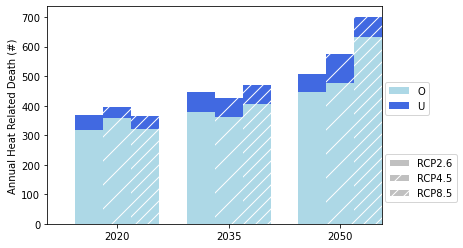

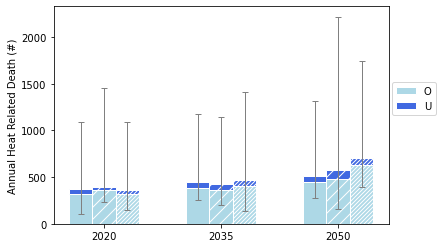

In [4]:
plot_impacts_heat(agg_impacts_mc, 'Annual Heat Related Death (#)', color=['lightblue', 'royalblue'])

#plt.savefig(''.join([fig_dir,'loss_ch/predicted_loss_2020_2065_werror.pdf']),bbox_inches='tight')


## Spatial Impact

In [9]:
category = 'O'
cm = palettable.scientific.sequential.LaJolla_20.mpl_colormap

directory_exposures = '../../input_data/exposures/'
exposures_file = ''.join([directory_exposures, 'exposures_mortality_ch_', category, '.h5'])
exposures = Exposures()
exposures.read_hdf5(exposures_file)
impact = impacts_mortality.median_matrix_as_impact(median_impact_matrices['RCP85'][2020]['U'], exposures, unit='Annual Heat Related Death (#)', percentage=False)
impact.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1)

2020-10-23 21:34:27,291 - climada.entity.exposures.base - INFO - Reading ../../input_data/exposures/exposures_mortality_ch_O.h5


<GeoAxesSubplot:>

ValueError: Expected 2-dimensional array, got 1

<Figure size 648x936 with 2 Axes>

In [12]:
impact = impacts_mortality.median_matrix_as_impact(median_impact_matrices['RCP85'][2020]['U'], exposures, unit='Annual Heat Related Death (#)', percentage=False, canton='Basel-Stadt')
impact.plot_hexbin_impact_exposure(pop_name=False, cmap=cm, buffer=0.1)

<GeoAxesSubplot:>

ValueError: Expected 2-dimensional array, got 1

<Figure size 648x936 with 2 Axes>

In [13]:
impacts_mortality.calculate_impact_agg_canton('Zürich', exposures)

KeyError: 'latitude'

In [27]:
impacts_mortality.median_impact_matrices['RCP85'][2020]['U']

<1x336734 sparse matrix of type '<class 'numpy.float64'>'
	with 327899 stored elements in Compressed Sparse Row format>

In [ ]:
pickle_in = \
open('../../output/mortality_results/impact_10mc.pickle','rb')
impacts_mortality = pickle.load(pickle_in)

agg_impacts_mc = impacts_mortality.agg_impacts_mc
median_impact_matrices = impacts_mortality.median_impact_matrices

directory_exposures = '../../input_data/exposures/'
exposures = {}
for category in ['O', 'U']:
    exposures_file = ''.join([directory_exposures, 'exposures_mortality_ch_',category,'.h5'])
    exposures[category] = Exposures()
    exposures[category].read_hdf5(exposures_file)
    #exposures[category] = Exposures(exposures[category])
    exposures[category].check()

agg_impact_zurich = impacts_mortality.calculate_impact_agg_canton(None, exposures)